In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

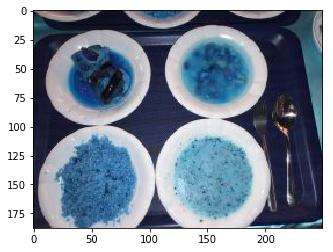

In [2]:
img = cv2.imread("fas4.jpg", 1)
height, width, channels = img.shape
plt.imshow(img)
plt.show()

In [3]:
def img2df(img):
    
    row = []
    col = []
    r = []
    g = []
    b = []
    
    for i in range(0, height):
        for j in range(0, width):
            row.append(i)
            col.append(j)
            b.append(img[i,j,0])
            g.append(img[i,j,1])
            r.append(img[i,j,2])
    
    d = {'row': row, 'col': col, 'r': r, 'g': g, 'b': b, 'center': np.nan}
    df = pd.DataFrame(data=d)
    return df

In [4]:
def knn(centers, df):
    for i in range(0, len(df)):
        temp = 100000000
        minI = 0
        for j in range(0, len(centers)):
            d = ed(df.iloc[i], centers.iloc[j])
            if(d < temp):
                minI = j
                temp = d
        
        df.center[i] = minI
        if(i % 1000 == 0):
            print(i)
    
    durum = 0
    diffs = []
    for i in range(0, len(centers)):
        x = len(df[df.center == i])
        if abs(elementCounts[i] - x) > width*height/10:
            durum = 1
        elementCounts[i] = x
        diffs.append(elementCounts[i] - x)
    print(diffs, width*height/100)
    
    if durum == 1:
        centers = newcenters(df, centers)
        knn(centers, df)
    else:
        return

In [5]:
def ed(p1, p2):
    d = pow(pow(p1.r - p2.r, 2) + pow(p1.g - p2.g, 2) + pow(p1.b - p2.b, 2) , 1/2)
    return d

In [6]:
def newcenters(df, centers):
    for i in range(0, len(centers)):
        centers.r[i] = df[df.center == i].r.mean()
        centers.g[i] = df[df.center == i].g.mean()
        centers.b[i] = df[df.center == i].b.mean()
    
    return centers

In [7]:
# converting image to data frame 
df = img2df(img)
#print(df)

# setting begining class centers
centers = df[:4].copy()
print(centers)

# setting element counts per class for begining
elementCounts = []
for i in range(0, len(centers)):
    elementCounts.append(1)

print(elementCounts)

# segmentation
knn(centers, df)
for a in range(0, len(centers)):
    b = df[df.center == a]
    for i in range(0, len(b)):
        img[b.row.iloc[i], b.col.iloc[i]] = [centers.b.iloc[a], centers.g.iloc[a], centers.r.iloc[a]]

plt.imshow(img)
plt.show()

   row  col    r    g    b  center
0    0    0   88   82   82     NaN
1    0    1  116  110  110     NaN
2    0    2  138  133  137     NaN
3    0    3  137  132  138     NaN
[1, 1, 1, 1]
0


c:\users\ilyas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


KeyboardInterrupt: 